## Titanic Project (Kaggle)

In [229]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [230]:
# Parse csv file

titanicDF = pd.read_csv('train.csv')
titanicDF.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


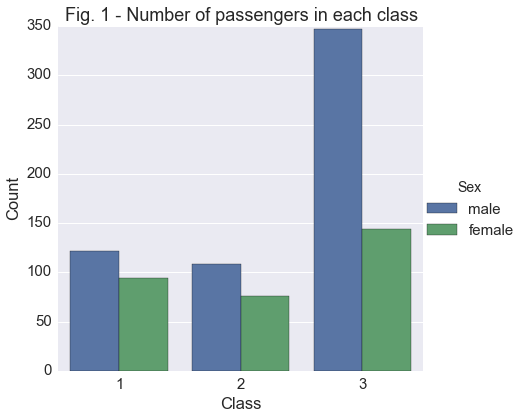

In [231]:
# Number of passengers in each class

sns.set(font_scale=1.5)
ax = sns.factorplot('Pclass', data=titanicDF, hue='Sex', kind='count', size=6)
ax.set(xlabel='Class', ylabel='Count', title='Fig. 1 - Number of passengers in each class')
plt.figure(figsize=(12, 6))

Classes 1 and 2 had similar numbers of males and females, but class 3 had a huge proportion of males. The third class was also the biggest by far, see value counts below.

In [232]:
titanicDF['Pclass'].value_counts()

3    491
1    216
2    184
dtype: int64

In [233]:
# Function returns male, female or child

def maleFemaleChild(passenger) :
    age, sex = passenger
    if age < 16 :
        return 'child'
    else :
        return sex

In [234]:
titanicDF['Person'] = titanicDF[['Age', 'Sex']].apply(maleFemaleChild, axis=1)

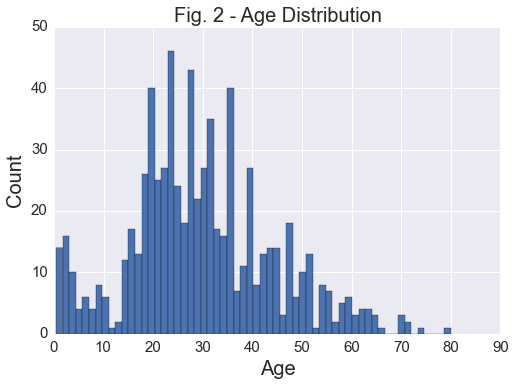

In [235]:
# Histogram of ages in sample

ax = titanicDF['Age'].hist(bins=60)
ax.set_ylabel('Count', fontsize=20)
ax.set_xlabel('Age', fontsize=20)
ax.set_title('Fig. 2 - Age Distribution', fontsize=20)

Most people were in the range 20-40, and the distribution tails off towards higher ages. There is a large number of young children (< 5) but a notable lack from the range 5-15.

In [236]:
titanicDF['Age'].mean()

29.69911764705882

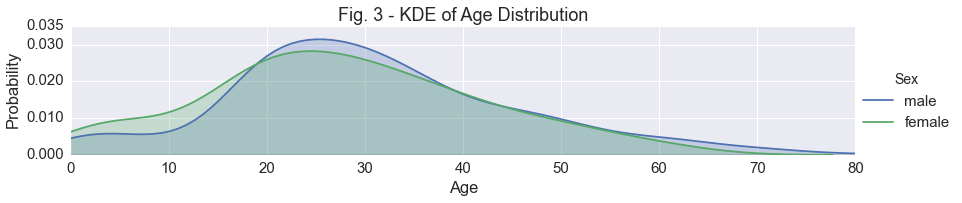

In [237]:
# KDE plot from age distribution histogram

fig = sns.FacetGrid(titanicDF, hue='Sex', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)

oldest = titanicDF['Age'].max()
fig.set(xlim=(0,oldest), ylabel='Probability', xlabel='Age', title='Fig. 3 - KDE of Age Distribution')
fig.set(yticks=[0.0, 0.01, 0.02, 0.03, 0.035])
fig.add_legend()

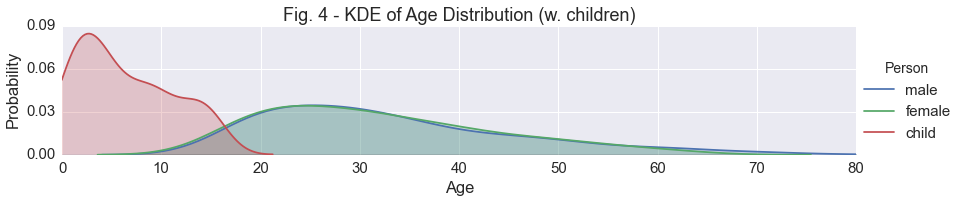

In [238]:
# KDE with children 

fig = sns.FacetGrid(titanicDF, hue='Person', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)

oldest = titanicDF['Age'].max()
fig.set(xlim=(0,oldest), ylabel='Probability', xlabel='Age', title='Fig. 4 - KDE of Age Distribution (w. children)')
fig.set(yticks=[0.0, 0.03, 0.06, 0.09])
fig.add_legend()
#NB should not go past 16 for child!

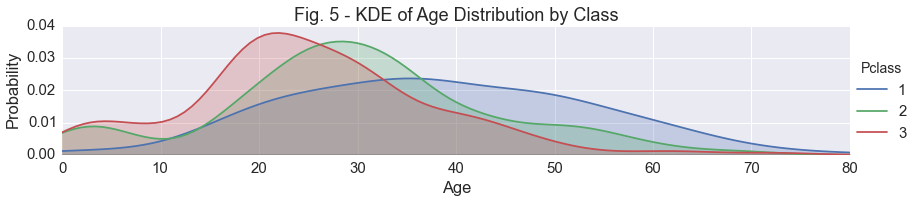

In [239]:
# KDE of age distribution by class

fig = sns.FacetGrid(titanicDF, hue='Pclass', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)

oldest = titanicDF['Age'].max()
fig.set(xlim=(0,oldest), ylabel='Probability', xlabel='Age', title='Fig. 5 - KDE of Age Distribution by Class')
fig.set(yticks=[0.0, 0.01, 0.02, 0.03, 0.04])

fig.add_legend()

We can see that the distribution shifts upwards with class.

In [240]:
# Determine the number of entries with non-null Cabin values
len(titanicDF) - titanicDF['Cabin'].isnull().sum()

204

In [241]:
deck = titanicDF['Cabin'].dropna()

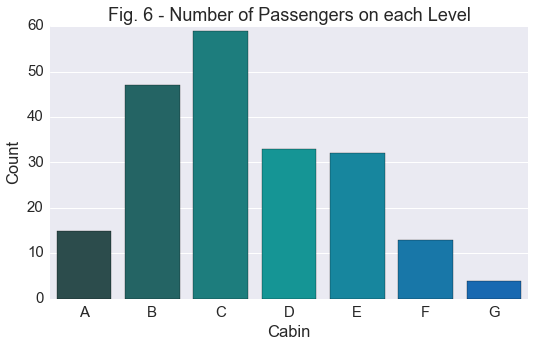

In [242]:
# New column taking first letter of each cabin to determine level

levels = []

for level in deck :
    levels.append(level[0])

cabinDF = pd.DataFrame(levels)
cabinDF.columns = ['Cabin']
cabinDF = cabinDF[cabinDF.Cabin != 'T']
sns.set(font_scale=1.5)
ax = sns.factorplot('Cabin', data=cabinDF, palette='winter_d', kind='count', order=['A','B','C','D','E','F','G'], size=5, aspect=1.5)
ax.set(xlabel='Cabin', ylabel='Count', title='Fig. 6 - Number of Passengers on each Level')
plt.figure(figsize=(12, 6))

Unfortunately we do not have much data for Decks A, F and G! 

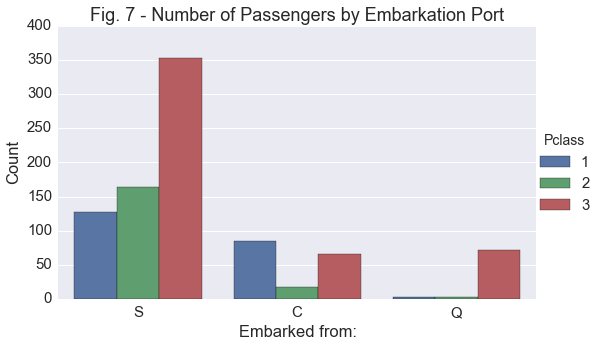

In [243]:
# Counts of Passengers by Port
# S: Southampton, C: Cherbourg, Q: Queenstown

ax = sns.factorplot('Embarked', data=titanicDF, hue='Pclass', kind='count', size=5, aspect=1.5)
ax.set(xlabel='Embarked from:', ylabel='Count', title='Fig. 7 - Number of Passengers by Embarkation Port')

Southampton was clearly the main port. Queenstown had predominantly third class passengers embark, whilst Cherbourg had relatively more first class passengers. A measure of the wealth of each city? N.B. Queenstown is now known as Cobh, (in Ireland).

In [244]:
# Column Alone is 'Alone' if SibSp and Parch are both zero, else, 'With Family'

titanicDF['Alone'] = titanicDF.SibSp + titanicDF.Parch

titanicDF['Alone'].loc[titanicDF['Alone'] > 0] = 'With Family'
titanicDF['Alone'].loc[titanicDF['Alone'] == 0] = 'Alone'

In [245]:
titanicDF.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male,Alone


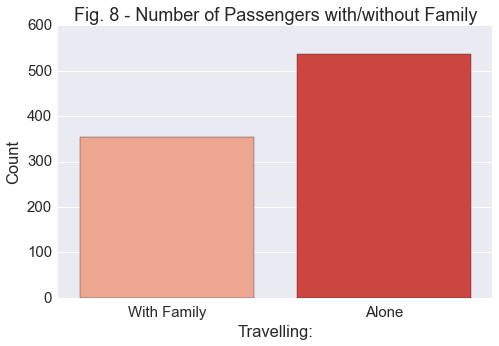

In [246]:
# Passengers with/without family

ax = sns.factorplot('Alone', data=titanicDF, palette='Reds', kind='count', size=5, aspect=1.4)
ax.set(xlabel='Travelling:', ylabel='Count', title='Fig. 8 - Number of Passengers with/without Family')

In [247]:
# Number of Survivors: 0=no, 1=survived

titanicDF['Survived'].value_counts()

0    549
1    342
dtype: int64

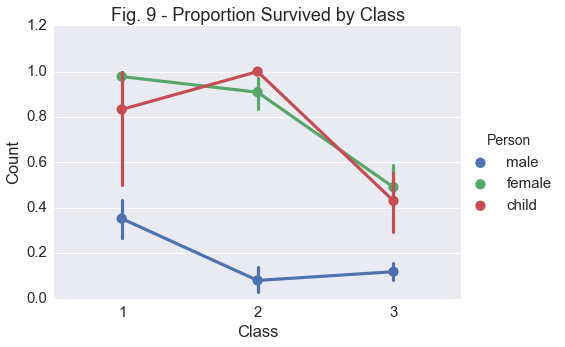

In [248]:
# Survival by class

ax = sns.factorplot('Pclass','Survived', hue='Person', data=titanicDF, size=5, aspect=1.4)
ax.set(xlabel='Class', ylabel='Count', title='Fig. 9 - Proportion Survived by Class', ylim=(0, 1.2))

We can see that males did not have a good survival rate across all classes. Women and children were better-off, but notably less so in third class.

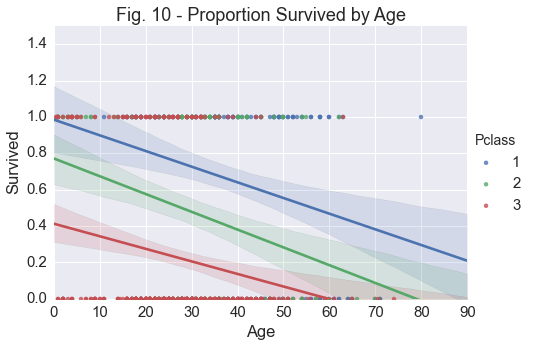

In [249]:
# Linear Regression applied to (Age, Survived)

ax = sns.lmplot('Age', 'Survived', hue='Pclass', data=titanicDF, size=5, aspect=1.4)
ax.set(xlabel='Age', ylabel='Survived', title='Fig. 10 - Proportion Survived by Age', ylim=(0, 1.5), xlim=(0, 90))

The proportion surviving decreased with age across all classes. The proportion surviving also increased with class. I.e. it was best to be a first-class baby.

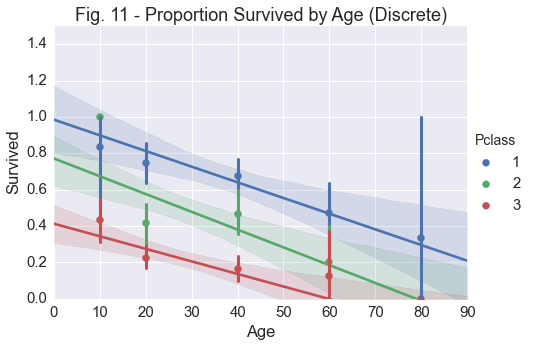

In [250]:
# Create bins for age variable

generations = [10, 20, 40, 60, 80]
ax = sns.lmplot('Age', 'Survived', hue='Pclass', data=titanicDF, x_bins=generations, size=5, aspect=1.4)
ax.set(xlabel='Age', ylabel='Survived', title='Fig. 11 - Proportion Survived by Age (Discrete)', ylim=(0, 1.5), xlim=(0, 90))

We see a high variability for the 60-80 first class bin.

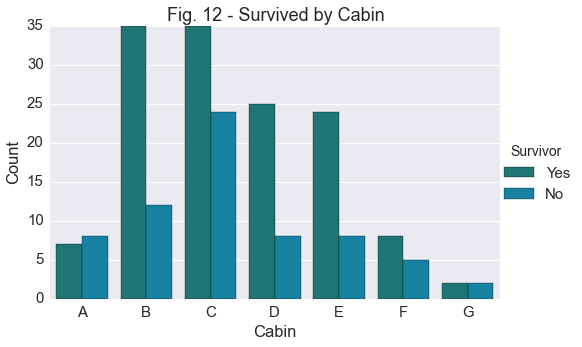

In [251]:
# Looking at survival for each level of the Titanic

titanicDF['Survivor'] = titanicDF['Survived'].map({0:'No', 1:'Yes'})
deck = titanicDF[['Cabin', 'Survivor']].dropna()

levels = []
for level in deck['Cabin'] :
    levels.append(level[0])
# Read first letter from cabin address

cabinDF = pd.DataFrame({'Cabin': levels, 'Survivor': deck['Survivor']})
cabinDF = cabinDF[cabinDF.Cabin != 'T']
ax = sns.factorplot('Cabin', data=cabinDF, hue='Survivor', palette='winter_d', kind='count',order=['A','B','C','D','E','F','G']
                   , size=5, aspect=1.4)
ax.set(xlabel='Cabin', ylabel='Count', title='Fig. 12 - Survived by Cabin')

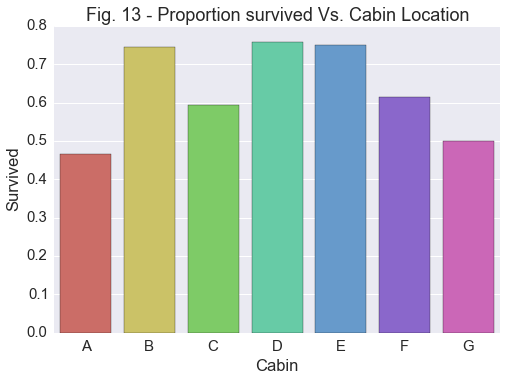

In [252]:
# Want to plot proportion survived vs Cabin location...

cabinDF.index = np.arange(0, len(cabinDF))

df2 = pd.DataFrame(cabinDF.groupby(['Cabin', 'Survivor']).size())
df2.columns = ['Count']
# Multi-index DF

grouped = df2.groupby(level=0)
df3 = grouped.sum()

df4 = df2.iloc[df2.index.get_level_values('Survivor') == 'Yes']
# Values of yes

df5 = pd.DataFrame(df4['Count']/df3['Count']).reset_index()
# P_i = n_i / sum(n_i)

del df5['Survivor']
df6 = df5.groupby('Cabin').sum()

ax = sns.barplot(x=df6.index, y=df6.Count, palette='hls')
ax.set(xlabel='Cabin', ylabel='Survived', title='Fig. 13 - Proportion survived Vs. Cabin Location')

In [253]:
url1 = 'https://en.wikipedia.org/wiki/Lifeboats_of_the_RMS_Titanic#Use_and_locations_aboard_Titanic'
url2 = 'http://www.titanicandco.com/inside.html'

Survival seems highest on the mid-range decks and worst on the top and bottom, however the lifeboats were placed on the Boat Deck (A)... Sources above.

In [254]:
titanicDF.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male,With Family,No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female,With Family,Yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,Yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female,With Family,Yes
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male,Alone,No


In [255]:
def family(passenger) :
    siblings, parents = passenger
    if (siblings == 0) and (parents == 0) :
        return 0
    else :
        return 1

In [256]:
titanicDF['Family'] = titanicDF[['SibSp', 'Parch']].apply(family, axis=1)

In [257]:
titanicDF['Family'].value_counts()

0    537
1    354
dtype: int64

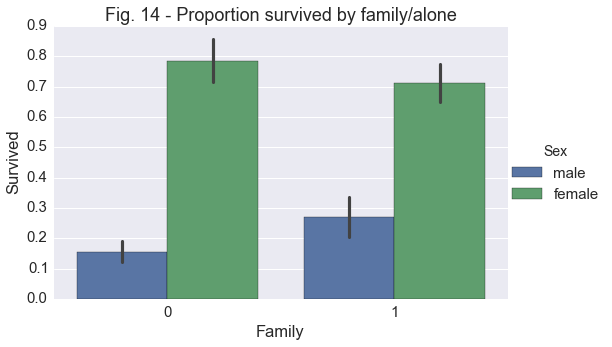

In [258]:
ax = sns.factorplot('Family','Survived', hue='Sex', kind='bar', data=titanicDF, size=5, aspect=1.5)
ax.set(xlabel='Family', ylabel='Survived', title='Fig. 14 - Proportion survived by family/alone')

Males who had families were more likely to survive, whilst females who didn't were more likely to survive.